In [177]:
PART 1

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import math
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')
#this is me importing everything

In [222]:
coins = 20
sets = 100
counts = np.zeros(trials+1)
allsuccesses = 0
for i in range (0, sets):
    draw = np.random.randint(2, size=coins)
    successes = len(draw[(np.where(draw == 1))])
    counts[successes] = counts[successes] + 1
    allsuccesses += successes
    #print(allsuccesses/coins)
probability = counts / (coins)
print(probability)
#1a. over a large set of trials, we define head as successes and divide by the total trials, which gives us
#the probability of a heads (it could be tails, it's arbitrary)
#1b. my variables-- trials is the amount of times that the coin will be flipped, which I have set to 20 here.
#sucesses is the number of heads we get-- python saves these as "successes", but we could call it "heads", or even
#"tails" if we were so inclined (or set draw == 0). It's just telling python which result to save.
#the two in randint is the number of coins, which we will leave for the time being.
#1c. how i filled the variables- 20 trials seems like a large enough set to get a good average, but not so many that
#python would brick or stop working. There's only one set of coins (ie one coin) for now. draw == 1 picks one of two
#possible values, but it doesn't really matter if it's one or zero.

[ 0.    0.    0.    0.    0.    0.    0.2   0.35  0.65  1.05  0.8   0.5
  0.6   0.55  0.2   0.05  0.05  0.    0.    0.    0.  ]


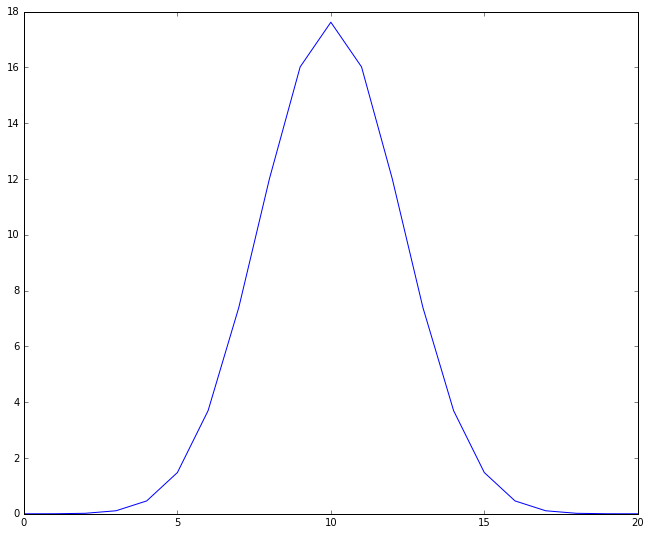

In [166]:
coins = 20
sets = 100
counts = np.zeros(coins+1)
allsuccesses = 0
for i in range (0, sets):
    draw = np.random.randint(2, size=coins)
    successes = len(draw[(np.where(draw == 1))])
    counts[successes] = counts[successes] + 1
    allsuccesses += successes
average = allsuccesses / (coins * sets)
plt.plot(np.arange(coins + 1), sets * PNx(coins))

#1d. (rest in peace 1 direction, stylized as 1D)
#the peak sits at 10, which is what we'd expect. there is some distribution around 10 in the analytical graph, but
#this is the idealized version, or what we'd expect for trials -> infinity.

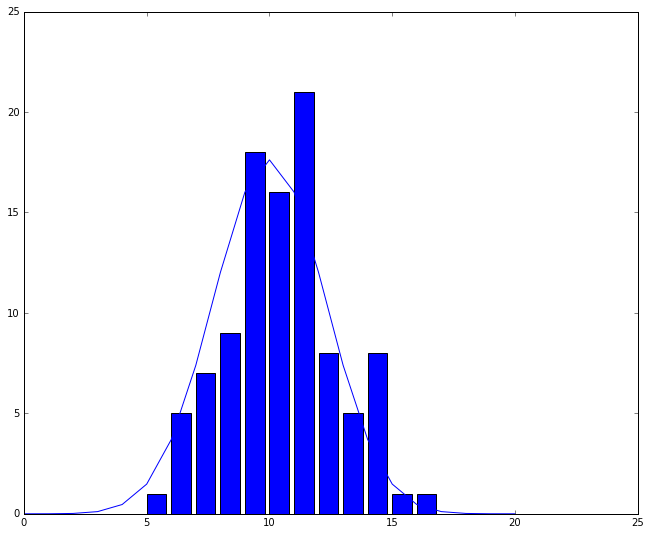

In [167]:
coins = 20
sets = 100
counts = np.zeros(coins+1)
allsuccesses = 0
for i in range (0, sets):
    draw = np.random.randint(2, size=coins)
    successes = len(draw[(np.where(draw == 1))])
    counts[successes] = counts[successes] + 1
    allsuccesses += successes
average = allsuccesses / (coins * sets)


#1e. this is the binomial pdf code, seen as the blue line. the above code block represents the bar graph
from scipy.misc import factorial
def PNx(trials):
    p = 0.5
    x = (np.arange(coins+1))
    PNx = factorial(coins)/((factorial(x)*factorial(coins-x)))*((p)**coins)
    return PNx

plt.bar(np.arange(coins + 1), counts)
plt.plot(np.arange(coins + 1), sets * PNx(coins))
#for this binomial probability distribution, we use the approximation for p=0.5, which is a slightly reduced form from
#the generic binomial probability formula. It's an idealized version of the longer binomial pdf. It seems to match
#up quite well with the analytical prediction, but it can vary depending which time you run it (thanks, probability).

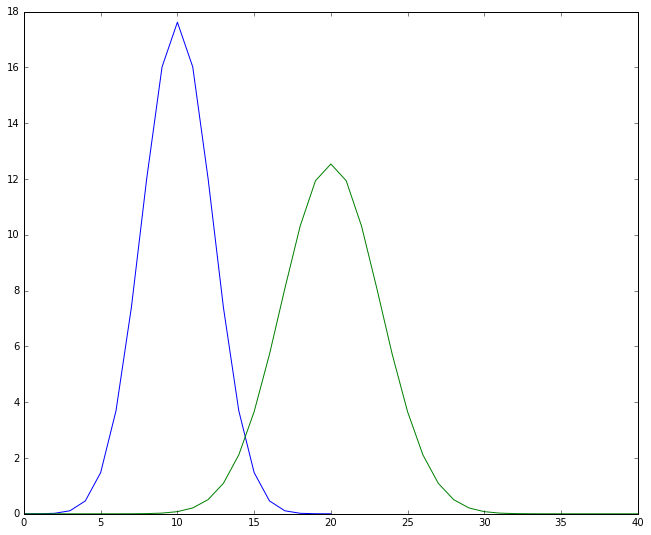

In [168]:
#the blue line (for 20 coins)
coins = 20
def PNx(coins):
    p = 0.5
    x = (np.arange(coins+1))
    PNx = (factorial(coins)/((factorial(x)*factorial(coins-x)))*((p)**coins))
    return PNx
plt.plot(np.arange(coins + 1), sets * PNx(coins))

#the green line (for 40 coins)
coins2 = 40
def PNx(coins2):
    p = 0.5
    x = (np.arange(coins2+1))
    PNx = (factorial(coins2)/((factorial(x)*factorial(coins2-x)))*((p)**coins2))
    return PNx
plt.plot(np.arange(coins2 + 1), sets * PNx(coins2))

In [176]:
#1f

In [178]:
PART 2

<Container object of 101 artists>

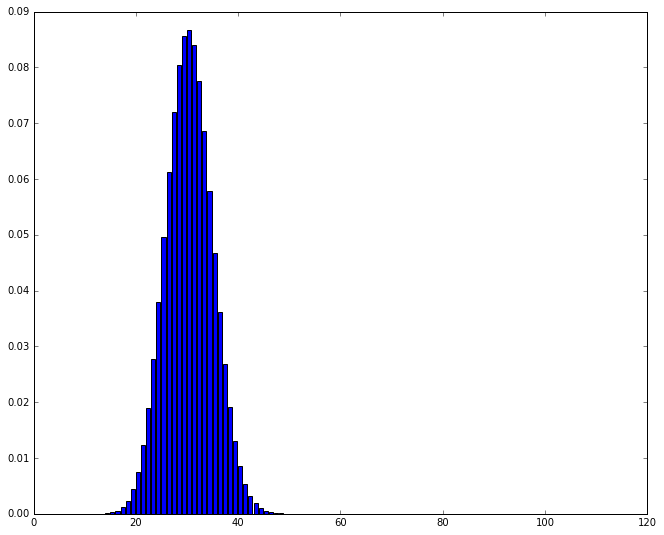

In [202]:
#2b. now we use the full binomial expression, but with a variable probability. here, i define it before the loop
#for honestly no reason, other than stylistically. when p=0.3, for example, the peak occurs around 30. when p=0.2, 
#the peak occurs around 20, and so on.
p = 0.3
def binomial(coins3):
    x = np.arange(coins3+1)
    binomial = factorial(coins)/((factorial(x)*factorial(coins-x)))*(p**x)*(1-p)**(coins-x)
    return binomial
plt.bar(np.arange(coins3+1), binomial(coins3), color = 'blue')

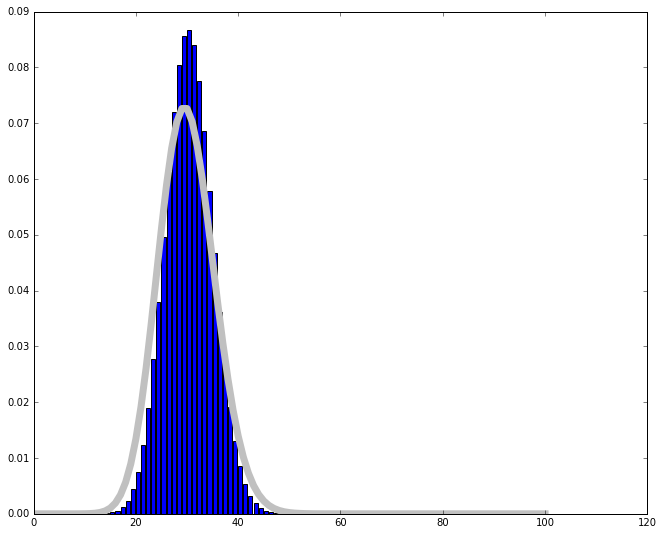

In [212]:
#2c. the block for the histogram is commented out (since it's only meant to run for p=0.5), but the empirical and
#probability distribution line up well. for increasing p, the empirical data (bar graph) will shift around accordingly
#but the Poisson distribution becomes a worse estimate for higher values of p. Poisson is the simplified binomial
#theorem value for p << 1, which is proven in the theory section. which makes sense -- it gets worse and worse as the
#p << 1 assumption becomes worse and worse. 

#this is the empirical results (ie randomly generated plot)
tries = 10000
coins3 = 100
counts = np.zeros(coins+1)
for i in range (0, tries):
    draw = np.random.random(size = coins3 + 1)
    successes = len(draw[(np.where(draw == 1))])
    counts[successes] = counts[successes] + 1
    allsuccesses += successes
    
probability = allsuccesses/coins
p = 0.3

#def binomial(coins3):
    #x = np.arange(coins3+1)
    #binomial = factorial(coins)/((factorial(x)*factorial(coins-x)))*(p**x)*(1-p)**(coins-x)
    #return binomial
#this is the idealized poisson distribution from the theory section
A = coins3*p
def poisson(coins3):
    n = np.arange(coins3+1)
    poisson = (A**n)*math.exp(-A)/(factorial(n))
    return poisson

#plt.plot(np.arange(coins + 1), sets * PNx(coins)/100, color = 'magenta')
plt.bar(np.arange(coins3+1), binomial(coins3), color = 'blue')
plt.plot(np.arange(coins3+1), poisson(coins3), color = 'silver', linewidth = 7.0)

In [281]:
p = 0.5

tries = 10000
coins3 = 100
counts = np.zeros(coins3+1)
for a in range (0,10):
    p = a/10
    for i in range(0,tries):
        draw = np.random.random(size = coins3)
        greater_count = len(draw[(np.where(draw <= p))])
        lesser_count = len(draw[np.where(draw > p)])
        counts[greater_count] = counts[greater_count] + 1
    probability = counts/tries
    
    exp1 = 0
    for i in range (0,coins3+1):
        exp1 += i * probability [i]
    print(exp1)
    
    exp2 = 0
    for i in range (0,coins3+1):
        exp2 += (i*i)*probability[i]


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
